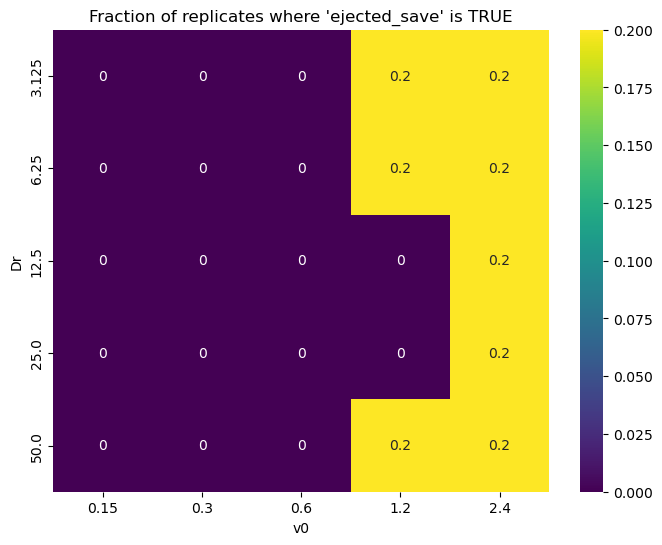

In [3]:
import bz2
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('..'))
import synmorph as sm

# ----------------------------
# SETTINGS
# ----------------------------
data_dir = "./results/Activity_Sweep"
tau_vals = [0.02, 0.04, 0.08, 0.16, 0.32]
Dr_vals = sorted(np.round(1/np.array(tau_vals), 3))
v0_vals = sorted([0.15, 0.30, 0.60, 1.2, 2.4])

n_reps = 5
boolean_key = "ejected_save"            # <--- whatever key you want to extract

# Heatmap array
H = np.zeros((len(Dr_vals), len(v0_vals)))

# ----------------------------
# BUILD HEATMAP MATRIX
# ----------------------------

for i, Dr in enumerate(Dr_vals):
    for j, v0 in enumerate(v0_vals):
        outcomes = []

        for rep in range(1, n_reps + 1):

            fname = f"Dr{Dr}_v{v0}_{rep}_simulation.pbz2"
            fpath = os.path.join(data_dir, fname)

            if not os.path.exists(fpath):
                print("Missing:", fpath)
                continue

            with bz2.BZ2File(fpath, "rb") as f:
                data = pickle.load(f)

            # Extract the boolean value from the Simulation class or dict
            # (Modify this depending on your saved structure)
            ejected = np.any(data[boolean_key])
            outcomes.append(ejected)

        # FRACTION TRUE across replicates
        H[i, j] = np.mean(outcomes) if outcomes else np.nan

# ----------------------------
# PLOT HEATMAP
# ----------------------------

plt.figure(figsize=(8, 6))
sns.heatmap(H, annot=True, cmap="viridis",
            xticklabels=v0_vals, yticklabels=Dr_vals)

plt.xlabel("v0")
plt.ylabel("Dr")
plt.title(f"Fraction of replicates where '{boolean_key}' is TRUE")
plt.show()

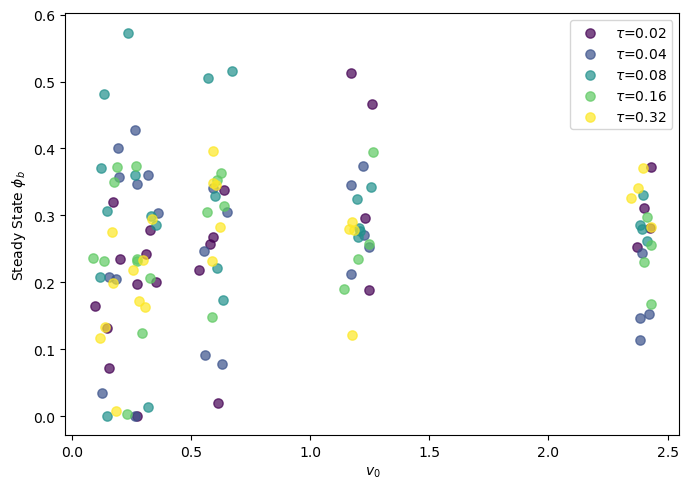

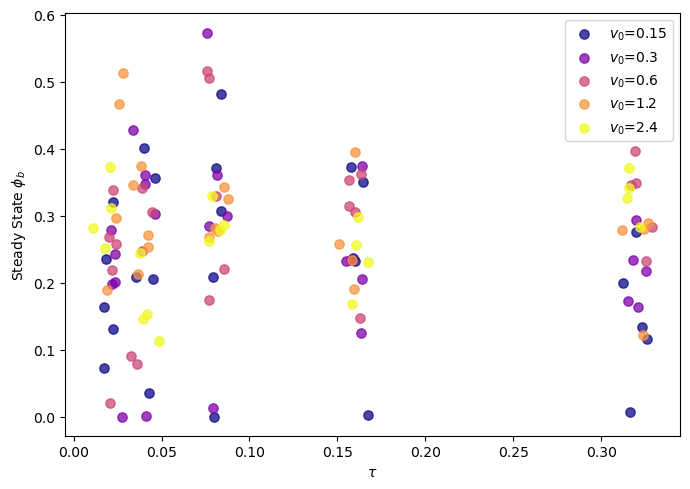

In [ ]:
def jitter(x, scale=0.02):
    return x + np.random.normal(scale=scale, size=len(x))

data_dir = "./results/Activity_Sweep"

tau_vals = [0.02, 0.04, 0.08, 0.16, 0.32]
Dr_vals = sorted(np.round(1/np.array(tau_vals), 3))
v0_vals = sorted([0.15, 0.30, 0.60, 1.2, 2.4])

n_reps = 5

# Storage lists
all_Dr = []
all_v0 = []
all_phi = []
all_rep = []

phi_key = "phi_save"  # Key for boundary fraction
ejected_key = "ejected_save"

for Dr in Dr_vals:
    for v0 in v0_vals:
        for rep in range(1, n_reps + 1):

            fname = f"Dr{Dr}_v{v0}_{rep}_simulation.pbz2"
            fpath = os.path.join(data_dir, fname)

            if not os.path.exists(fpath):
                print("Missing:", fpath)
                continue

            # Load Simulation object
            with bz2.BZ2File(fpath, "rb") as f:
                sim = pickle.load(f)

            # ---- skip if ejection ever happened ----
            if np.any(sim[ejected_key]):
                # Skip this run entirely
                continue

            # Extract φ_b (last 10 points average)
            phi_avg = float(np.mean(sim[phi_key][-10:, 2]))

            # Append to lists
            all_Dr.append(Dr)
            all_v0.append(v0)
            all_phi.append(phi_avg)

# Convert to numpy arrays (optional)
all_Dr = np.array(all_Dr)
all_v0 = np.array(all_v0)
all_phi = np.array(all_phi)
all_rep = np.array(all_rep)
all_tau = np.round(1 / all_Dr, 2)

colors = plt.cm.viridis(np.linspace(0, 1, len(Dr_vals)))

plt.figure(figsize=(7, 5))

for tau_i, c in zip(tau_vals, colors):
    mask = all_tau == tau_i
    v0_group = all_v0[mask]
    phi_group = all_phi[mask]

    # jitter v0 slightly for visibility
    v0_j = jitter(v0_group, scale=0.015*np.ptp(v0_group))

    plt.scatter(v0_j, phi_group, s=45, color=c, alpha=0.7, label=r"$\tau$="+f"{tau_i}")

plt.xlabel(r"$v_0$")
plt.ylabel(r"Steady State $\phi_b$")
plt.legend()
plt.tight_layout()
plt.show()

# Unique v0 values
v0_vals = np.unique(all_v0)
colors = plt.cm.plasma(np.linspace(0, 1, len(v0_vals)))

plt.figure(figsize=(7, 5))

for v0_i, c in zip(v0_vals, colors):
    mask = all_v0 == v0_i
    tau_group = all_tau[mask]
    phi_group = all_phi[mask]

    # jitter Dr slightly
    tau_j = jitter(tau_group, scale=0.015*np.ptp(tau_group))

    plt.scatter(tau_j, phi_group, s=45, color=c, alpha=0.75, label=r"$v_0$="+f"{v0_i}")

plt.xlabel(r"$\tau$")
plt.ylabel(r"Steady State $\phi_b$")
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
import bz2, pickle
import numpy as np
import sys
import os
sys.path.append(os.path.abspath('..'))
import synmorph as sm

In [13]:

tau_vals = [0.02, 0.04, 0.08, 0.16, 0.32]
Dr_vals = 1/np.array(tau_vals)
v0_vals = [0.15, 0.3, 0.6, 1.2, 2.4]
replicates = range(5)
simulation_file_name = f'Dr{round(Dr_vals[4], 3)}_v{v0_vals[0]}_{replicates[0]+1}'

with bz2.BZ2File("./results/Activity_Sweep/" + simulation_file_name + "_simulation.pbz2", "rb") as f:
    data = pickle.load(f)

print(data.keys())

dict_keys(['simulation_params', 'save_options', 't', 't_span', 't_span_save', 'nt', 'nts', 'x_save', 'tri_save', 'var_save', 'grn', 'phi_save', 'ejected_save', 'date', 'name', 'id', 'save_dir', 'save_dir_pickled', 'save_dir_plots'])


In [14]:
print(np.any(data['ejected_save']))

False


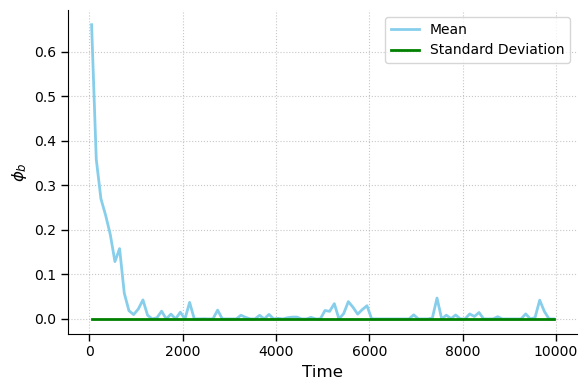

In [15]:
from data_analytics import binned_stats

binned_stats(data, bin_size=100)

In [9]:
path = "./results/Activity_Sweep/Dr50.0_v0.15_1_simulation.pbz2"
print("Exists:", os.path.exists(path))
print("Absolute path:", os.path.abspath(path))

Exists: False
Absolute path: /Users/taylorwomack/Library/CloudStorage/Box-Box/Gartnerlab Data/Rotations/Taylor Womack/synmorph/results/Activity_Sweep/Dr50.0_v0.15_1_simulation.pbz2
